## DS4400 Coding Exam

This is the coding exam for DS4400. You have 100 minutes in the lecture. Please write down all the codes and in the Code chuck and written answers in the markdown chuck. Add any chuck if you need. Submit the exam as the homework, with both python and pdf file. The exam is open-book, open notes. Please raise your hand if you have any questions. 

#### Question 1: Data analysis
In the following question, you will need to analysis a simulated data. Please answer each question below the instructions. 

In [1]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(4400)

# Number of samples
num_samples = 1000

# Create 20 random variables
X = pd.DataFrame()
for i in np.arange(1, 21):
    variable_name = f"Var{i}"
    X[variable_name] = np.random.rand(1000)

# Create a target variable based on some combination of the 20 variables
y = (
    2 * X["Var1"]
    + 0.5 * X["Var5"]
    - 1 * X["Var10"]
    + np.random.normal(0, 0.5, num_samples)  # Add some noise
)


1. Split the data into training and test data. The proportion of train data should be 70%. 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the target variable
target = y
df_dropped = X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_dropped, target, test_size=0.3, random_state=4400)

2. Fit the model with a linear regression using all the features, report the coefficient table, intercept and MSE. 

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


# Calculate the mse and print
MSE = mean_squared_error(y_test, y_pred)
print(f'The MSE of this linear regression model is: {MSE}')

# Print the estimated intercept coefficient
print('The estimated intercept coefficient is %.3f' % lm.intercept_)

# Print the estimated coefficients for all features
for feature, coefficient in zip(X.columns, lm.coef_):
    print('The estimated coefficient for {} is {:.3f}'.format(feature, coefficient))

The MSE of this linear regression model is: 0.28330490934997354
The estimated intercept coefficient is -0.023
The estimated coefficient for Var1 is 2.014
The estimated coefficient for Var2 is -0.070
The estimated coefficient for Var3 is -0.119
The estimated coefficient for Var4 is 0.015
The estimated coefficient for Var5 is 0.426
The estimated coefficient for Var6 is 0.022
The estimated coefficient for Var7 is 0.050
The estimated coefficient for Var8 is 0.098
The estimated coefficient for Var9 is -0.073
The estimated coefficient for Var10 is -1.096
The estimated coefficient for Var11 is 0.007
The estimated coefficient for Var12 is 0.078
The estimated coefficient for Var13 is 0.025
The estimated coefficient for Var14 is -0.015
The estimated coefficient for Var15 is -0.052
The estimated coefficient for Var16 is -0.034
The estimated coefficient for Var17 is -0.081
The estimated coefficient for Var18 is 0.126
The estimated coefficient for Var19 is 0.086
The estimated coefficient for Var20 

3. Fit the model with a polynomial regression with degree 2, report the MSE. Is it necessary to use polynomial regression in this case?

In [4]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree=degree)

X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Calculate the estimated values for each observation
y_poly_fit = poly_model.predict(X_poly_test)

MSE = mean_squared_error(y_test, y_poly_fit)
print(f'The MSE of this polynomial regression model with degree 2 is: {MSE}')

The MSE of this polynomial regression model with degree 2 is: 0.39129598085883627


The MSE increases when I change the it from a linear model to a polynomial regression with a degree of 2 . It increased the MSE because it might be overfitting. As the degree of the polynomial increases, the model becomes more flexible and can fit the training data points with high precision. It may capture even the noise in the training data, resulting in a lower training error (MSE). So, in this case it probably is not neccessary.

4. Fit the model with a Lasso regression, tune the parameter for the penalty parameter $\alpha$. Report the best $\alpha$, MSE and which variables are left in the model in the end. 

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [6]:

# Fit a Lasso regression model
alpha = 0.1  # L1 regularization strength (adjust as needed)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
lasso_mse = mean_squared_error(y_test, y_pred)
# Print the results
print("Mean Squared Error (MSE):", lasso_mse)

Mean Squared Error (MSE): 0.29919888159656777


In [7]:
# Define a range of alpha values and l1 ratio to tune
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create a parameter grid for GridSearchCV as a dictionary
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha and L1 ratio values from the tuning
best_alpha = grid_search.best_params_['alpha']

print(f'Best alpha: {best_alpha}')

Best alpha: 0.01


In [8]:
# Fit a Lasso regression model
alpha = 0.1  # L1 regularization strength (adjust as needed)
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
lasso_mse = mean_squared_error(y_test, y_pred)
# Print the results
print("Mean Squared Error (MSE):", lasso_mse)

Mean Squared Error (MSE): 0.27893476514858456


   Feature  Coefficient Estimate
0     Var1              0.566406
1     Var2             -0.012671
2     Var3             -0.024085
3     Var4              0.000000
4     Var5              0.111930
5     Var6              0.000000
6     Var7              0.008001
7     Var8              0.017024
8     Var9             -0.013400
9    Var10             -0.306822
10   Var11              0.000000
11   Var12              0.012300
12   Var13              0.000000
13   Var14             -0.000000
14   Var15             -0.006134
15   Var16             -0.002697
16   Var17             -0.016334
17   Var18              0.025483
18   Var19              0.013672
19   Var20              0.024080


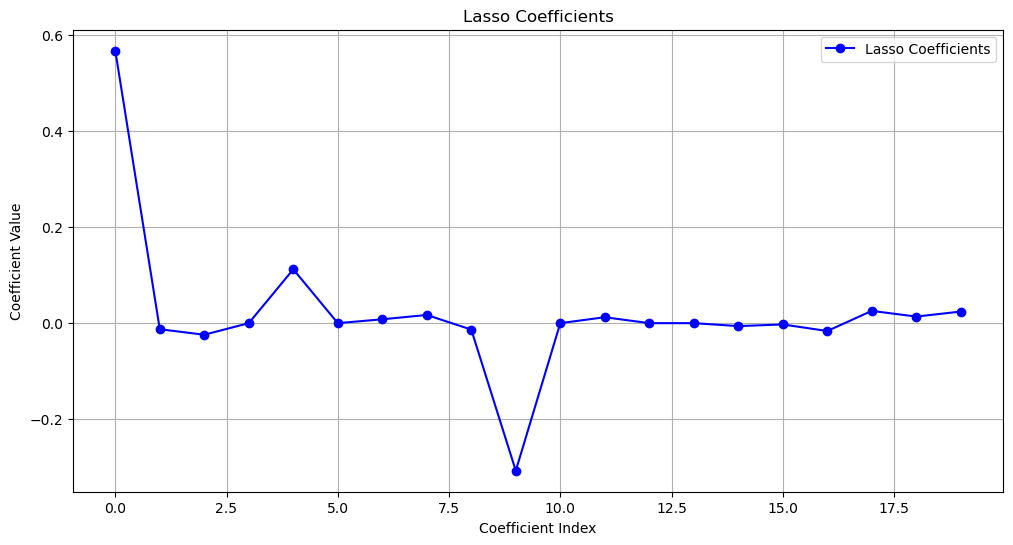

In [9]:
coeff_df = pd.DataFrame(df_dropped.columns)
coeff_df.columns = ["Feature"]
coeff_df["Coefficient Estimate"] = pd.Series(lasso_model.coef_)
print(coeff_df)

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(lasso_model.coef_, marker='o', linestyle='-', color='b', label='Lasso Coefficients')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients")
plt.legend()
plt.grid(True)
plt.show()

5. Define a new target variable $y_1$ such that $y_1$ only contains all the positive values in the $y$. Process $X$ as well. Fit the model with appropriate GLM model (not Gaussian). Report the MSE and can we compare the MSE with previous questions? Hint: it is a continous distribution. 

In [10]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Filter positive values in y and corresponding rows in X
positive_mask = y > 0
y1 = y[positive_mask]
X_filtered = X[positive_mask]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y1, test_size=0.2, random_state=4400)

gamma_model = sm.GLM(y_train, X_train, family = sm.families.Gamma(link = sm.families.links.log()))
gamma_result = gamma_model.fit()
y_pred_gamma = gamma_result.predict(X_test)
mse_gamma = mean_squared_error(y_test, y_pred_gamma)

print('MSE for Gamma is:', mse_gamma)

MSE for Gamma is: 0.2512618530229509


/Users/matthewxue/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


The mse for gamma was lower than the mse for all previous questions. So we can assume that the gamma distribution is performing better in terms of accuracy.


6. Define a new target variable $y_2$ such that $y_2$ is a binary categorical variable. If $y$ is larger than 1, then $y_2$ is "group1", otherwise it is "group2". Fit the $y_2$ and $X$ with a logistic regression. Print the summary table with .summary(), and interpret the coefficient for variable 1.  

In [11]:
y2 = [1 if val > 1 else 0 for val in y]

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=4400)

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = model.fit()
y_pred = results.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)

print(MSE)

# Print the summary table
print(results.summary())

0.17381824716985733
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  800
Model:                            GLM   Df Residuals:                      780
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -306.60
Date:                Mon, 16 Oct 2023   Deviance:                       613.19
Time:                        13:23:46   Pearson chi2:                     656.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4357
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Var1           7.0764      0.514

An increase in variable 1 will lead to a increase in log-odds of the binary outcome by 7.0764 units. So, variable 1 is pretty siginificant for this data.

#### Question 2: Implement Gradient descend for Polynomial Regression

Implement gradient descend method for the polynomial regression. Requirement: 
1. Write the method as a function, which is given here. Notice that it takes an input "degree" (and any other necessary inputs) so that we can change the degree of the polynomial. 
2. Output the cost history as well as the coefficient estimates. No need to print it or make the figures. As long as it is one of the output. 
3. Verify your function with the data in Question 1 (You may need to copy/paste and run the answer in Question 1-1 before you run the verification). No need to compare your coefficients to the ones in question 1. This step is only to make sure your functions work. You can set the degree as 2 in the verification. 

Hint: 
1. Don't overthinking the question. What is the difference between linear regression and polynomial regression?
2. You may need two functions here. One for pre-processing the data, while the other one for gradient desent. You can add more if you need. Like to add another one for the cost function. 
3. When initializing the theta, think about how many coefficients you may need?

In [12]:
from sklearn.preprocessing import PolynomialFeatures

def poly_function(degree, X):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    return X_poly


def gradient_descent(X, y, degree, learning_rate=0.01, num_iterations=100):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize theta with zeros
    cost_history = []
    
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        error = predictions - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)
        
    return theta, cost_history

In [13]:
# Generate polynomial features for X (e.g., degree=2)
degree = 2
X_poly = poly_function(degree, X_train)

# Initialize theta with zeros
initial_theta = np.zeros(X_poly.shape[1])

# Perform gradient descent for polynomial regression
num_iterations = 100
learning_rate = 0.01
theta, cost_history = gradient_descent(X_poly, y_train, degree, learning_rate, num_iterations)

print("Coefficient estimates:", theta)
print("Cost history:", cost_history)

Coefficient estimates: [ 2.41927794e-02  7.28982067e-02  4.17985792e-03  2.32697937e-03
  9.70222450e-03  2.24022756e-02  7.40926656e-03  1.56591430e-02
  9.00709137e-03  1.07970732e-02 -1.88434520e-02  7.42170886e-03
  2.32812829e-03  8.01735037e-03  1.27137601e-02  7.03280232e-03
  3.78497074e-03  1.05633581e-03  1.47522754e-02  9.11309225e-03
  1.17639582e-02  7.11546684e-02  3.22669201e-02  3.16416022e-02
  3.61887087e-02  4.30924609e-02  3.46494240e-02  3.94454660e-02
  3.47462078e-02  3.55264124e-02  1.94656770e-02  3.45404102e-02
  3.03633153e-02  3.54292126e-02  3.55555688e-02  3.30206830e-02
  3.27189504e-02  2.97834255e-02  3.84292674e-02  3.49161546e-02
  3.52040542e-02 -1.73878014e-04 -2.10792548e-03 -4.42635483e-04
  8.80105355e-03  1.96950391e-03  2.81835212e-03 -5.86649733e-04
  2.49469275e-03 -1.16159638e-02  3.65179544e-05 -4.11180002e-03
 -3.46963835e-04  8.01379871e-04 -2.59558284e-03 -3.22830541e-03
 -1.01037484e-03  4.80566552e-03 -7.74884269e-04  1.68173822e-03
 -

In [14]:
# Calculate predictions using the final theta values
predictions = np.dot(X_train, theta)

# Calculate the squared differences between predictions and actual values
squared_errors = (predictions - y_train) ** 2

# Calculate the MSE (mean of squared errors)
mse = np.mean(squared_errors)

print("Mean Squared Error (MSE):", mse)

ValueError: shapes (800,20) and (231,) not aligned: 20 (dim 1) != 231 (dim 0)

#### Question 3: Simulation study

Following is a simulation study. In the second code chuck, please correctly label the xlabel and ylabel for the plot. Also explain what this code is trying to do and what you have learned from the generated figure. 

Hint: in the simulation data, there are 200 observations and it is fixed for each trial. After spliting the training and testing data, each one will have 100 observations. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# a random seed is set to ensure reproducibility of the random data generation
np.random.seed(83) 

# A will store the number of predictor variables 
# B will store the mean squared error for each number of predictor variables
A = np.arange(5,101,1)
B = []

for p in A:
    
    X = pd.DataFrame()
    for i in np.arange(1, p+1):
        variable_name = f"Var{i}"
        X[variable_name] = np.random.rand(200)

    y = 2 * X["Var1"] - 0.5 * X["Var5"] + np.random.normal(0, 0.5, 200)

    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.5, 
                                                        random_state=83)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    value = mean_squared_error(y_test, y_pred)
    B.append(value)

In [ ]:
plt.plot(A, B)
plt.xlabel("Number of Predictor Variables (p)")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

It creates a data frame (X) with p predictor variables (Var1, Var2, ..., Varp), each containing 200 random values.Then, the target variable (y) is created as a linear combination of the first and fifth predictor variables, with some added random noise. We will split the data into training and testing sets, with 50% of the data used for testing. This split is done with a fixed random seed for consistency. A linear regression model is then trained on the training data (X_train and y_train). The model is used to make predictions on the testing data (X_test), and the mean squared error is calculated by comparing the true values (y_test) with the predicted values (y_pred). Finally, the calculated mean squared error is appended to the B array for later analysis.

The figure tells us how the model's performance changes as the number of predictor values are added. So there is a potential to overfit as we add more variables